In [1]:
import os
import glob

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

from datasets.data_util import *

In [2]:
def plot_point(img: Image, points: np.ndarray) -> Image:
    img = np.array(img, dtype=np.uint8)

    for point in points:
        co = (int(point[0]), int(point[1]))
        cv2.drawMarker(img, co, (255, 255, 255), markerType=cv2.MARKER_CROSS, markerSize=2, thickness=2, line_type=cv2.LINE_4)

    img = Image.fromarray(img)

    return img

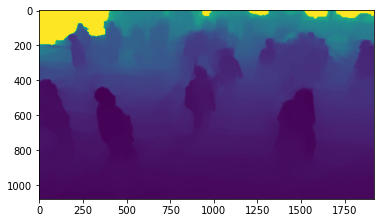

In [3]:
# configure

dataset_path = '/mnt/hdd02/ShanghaiTech/part_A'

im_path = '/mnt/hdd02/ShanghaiTechRGBD/test_data/test_img/IMG_0000.png'
dep_path = create_depth_path(im_path, dataset=judge_dataset(im_path), phase='test')

img = Image.open(im_path)
depth = load_depth(dep_path)

#out = plot_point(img, gt)
plt.imshow(np.array(depth))

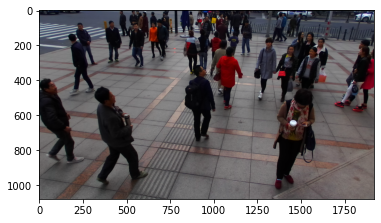

In [5]:
plt.imshow(img)

In [16]:
tr_df = pd.DataFrame()

"""
tr_df:
    image_path
    width
    height
    people_num
"""
dataset_path = '/mnt/hdd02/ShanghaiTechRGBD'

img_path_list = glob.glob( os.path.join(dataset_path, 'train_data', 'train_img', '*.png') )

for i, img_path in enumerate(img_path_list):
    img = Image.open(img_path)
    w, h = img.size
    
    line = {
        'image_path': img_path,
        'width': w,
        'height': h,
    }

    tr_df = tr_df.append(line, ignore_index=True)

In [19]:
tr_df.describe()

,height,width
count,1193.0,1193.0
mean,1080.0,1920.0
std,0.0,0.0
min,1080.0,1920.0
25%,1080.0,1920.0
50%,1080.0,1920.0
75%,1080.0,1920.0
max,1080.0,1920.0
